In [8]:
! conda install  -y -c r r 
#! conda install -c r rpy2 

Solving environment: done

# All requested packages already installed.



In [9]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline


## https://rpy2.github.io/doc/latest/html/interactive.html

In [5]:
%load_ext rpy2.ipython
# %reload_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [11]:
%R library(extRemes)
%R library(stats)

array(['extRemes', 'car', 'distillery', 'Lmoments', 'tools', 'RevoUtils',
       'stats', 'graphics', 'grDevices', 'utils', 'datasets',
       'RevoUtilsMath', 'methods', 'base'], dtype='<U13')

In [12]:
%%R
install.packages('extRemes', dependencies=TRUE)

/home2/nhn2/miniconda3/envs/pangeo/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/home2/nhn2/miniconda3/envs/pangeo/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
  warnings.warn(x, RRuntimeWarning)
/home2/nhn2/miniconda3/envs/pangeo/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The downloaded source packages are in
	‘/tmp/RtmpUzvFY9/downloaded_packages’
  warnings.warn(x, RRuntimeWarning)
/home2/nhn2/miniconda3/envs/pangeo/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Updating HTML index of packages in '.Library'

  warnings.warn(x, RRuntimeWarning)
/home2/nhn2/miniconda3/envs/pangeo/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Making 'packages.html' ...
  warnings.warn(x, RRuntimeWarning)
/home2/nhn2/miniconda3/envs/pangeo/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRunt

In [13]:
d = pd.read_csv('1950-2016_all_tornadoes.csv', 
                delimiter=',',
                header=0,
                error_bad_lines=False, 
                parse_dates=[[1,2,3,5]], 
                keep_date_col=True)
d.head()

,yr_mo_dy_time,om,yr,mo,dy,date,time,timezone,state,stateFIPS,...,lenghtmiles,widthyards,ns,sn,sg,fips1,fips2,fips3,fips4,fc
0,1950-01-03 11:00:00,1,1950,1,3,1/3/50,11:00:00,3,MO,29,...,9.5,150.0,2,0,1,0,0,0,0,0
1,1950-01-03 11:00:00,1,1950,1,3,1/3/50,11:00:00,3,MO,29,...,6.2,150.0,2,1,2,189,0,0,0,0
2,1950-01-03 11:10:00,1,1950,1,3,1/3/50,11:10:00,3,IL,17,...,3.3,100.0,2,1,2,119,0,0,0,0
3,1950-01-03 11:55:00,2,1950,1,3,1/3/50,11:55:00,3,IL,17,...,3.6,130.0,1,1,1,135,0,0,0,0
4,1950-01-03 16:00:00,3,1950,1,3,1/3/50,16:00:00,3,OH,39,...,0.1,10.0,1,1,1,161,0,0,0,0


In [14]:
T_vect = np.array([2,5,10,20,50,100,200,500])
# %Rpush T_vect
%R -i T_vect

In [15]:
%R T_vect

array([  2,   5,  10,  20,  50, 100, 200, 500], dtype=int32)

In [16]:
%R -i d

In [20]:
%%R 
head(d)

        yr_mo_dy_time om   yr mo dy    date     time timezone state stateFIPS
0 1950-01-03 11:00:00  1 1950  1  3  1/3/50 11:00:00        3    MO        29
1 1950-01-03 11:00:00  1 1950  1  3  1/3/50 11:00:00        3    MO        29
2 1950-01-03 11:10:00  1 1950  1  3  1/3/50 11:10:00        3    IL        17
3 1950-01-03 11:55:00  2 1950  1  3  1/3/50 11:55:00        3    IL        17
4 1950-01-03 16:00:00  3 1950  1  3  1/3/50 16:00:00        3    OH        39
5 1950-01-13 05:25:00  4 1950  1 13 1/13/50  5:25:00        3    AR         5
  StateNumber EFscale injuries fatalities loss croploss startlat startlon
0           1       3        3          0    6        0    38.77   -90.22
1           1       3        3          0    6        0    38.77   -90.22
2           1       3        0          0    5        0    38.82   -90.12
3           2       3        3          0    5        0    39.10   -89.30
4           1       1        1          0    4        0    40.88   -84.58
5         

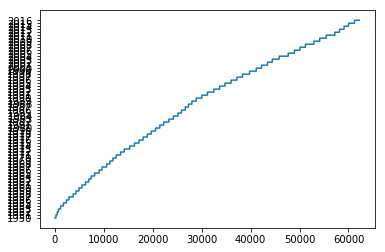

In [23]:
%R df = data.frame(year=d['yr'],month=d['mo'],day=d['dy'],Tor=d['lenghtmiles'])
%R head(df)

plt.plot(d.yr)

In [24]:
%R dim(df)

array([62208,     4], dtype=int32)

In [25]:
%R yearvalue = df['yr'];

In [26]:
%%R
model.lm <- lm(d$lenghtmiles ~ d$widthyards, data = d)

# Use predict to estimate the values for aim.
# Note that predict expects a data.frame and the col 
# names need to match
summary(model.lm)


Call:
lm(formula = d$lenghtmiles ~ d$widthyards, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-59.065  -2.277  -2.036  -0.578 229.521 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.9759985  0.0368951   53.56   <2e-16 ***
d$widthyards 0.0160160  0.0001612   99.33   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.216 on 62206 degrees of freedom
Multiple R-squared:  0.1369,	Adjusted R-squared:  0.1369 
F-statistic:  9866 on 1 and 62206 DF,  p-value: < 2.2e-16



In [31]:
%%R
model.lm$coeff[1]

(Intercept) 
   1.975999 


In [32]:
%R -o model.lm$coeff[1]

LookupError: 'model.lm$coeff[1]' not found

In [34]:
%%R
coeff_int=model.lm$coeff[1]

In [35]:
%R -o coeff_int

In [36]:
coeff_int

1.975999


In [37]:
np.asarray(coeff_int)

array([1.9759985])

In [38]:
%R bmEF <- blockmaxxer(df, blocks = df$yr, which="lenghtmiles")  

,yr,mo,dy,lenghtmiles
21,1950,2,12,82.60
214,1951,2,20,112.80
642,1952,6,23,104.80
776,1953,3,22,234.70
1328,1954,4,30,139.90
1808,1955,4,12,112.80
2817,1956,10,29,147.70
2995,1957,4,8,121.40
3740,1958,2,26,95.50
4884,1959,10,10,48.70


In [40]:
%R fitGum <- fevd(lenghtmiles, data= df, type = "Gumbel", method = "MLE", verbose = FALSE)  


R object with classes: ('fevd',) mapped to:
<ListVector - Python:0x7f6d51b97908 / R:0x55abfb6e82f0>
[Vector, StrVector, FloatVector, BoolVector, ..., StrVector, StrVector, ListVector, ListVector]
  call: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('fevd',) mapped to:
<Vector - Python:0x7f6d5259f188 / R:0x55abfa388978>
[RObject, RObject, RObject, StrVe..., StrVe..., BoolV...]
  data.name: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x7f6d5251a788 / R:0x55abfa8325a0>
['lenghtmiles', 'df']
  weights: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f6d5243fdc8 / R:0x55abf9d3e9d8>
[1.000000]
  in.data: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x7f6d5243fac8 / R:0x55abeffe7878>
[       1]
...
  x: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x7f6d5243f688 / R:0x55abfa82bb68>
['na.fail']
  cov.data: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x7f6d5243f608 / R:0x55ac01c5cd70>
['location', 'scale']
R object with classes: ('fevd',) mapped to:
<ListVector - Python:0x7f6d51b97908 / R:0x55abfb6e82f0>
[Vector, StrVector, FloatVector, BoolVector, ..., StrVector, StrVector, ListVector, ListVector]
R object with classes: ('fevd',) mapped to:
<ListVector - Python:0x7f6d51b97908 / R:0x55abfb6e82f0>
[Vector, StrVector, FloatVector, BoolVector, ..., StrVector, StrVector, ListVector, ListVector]

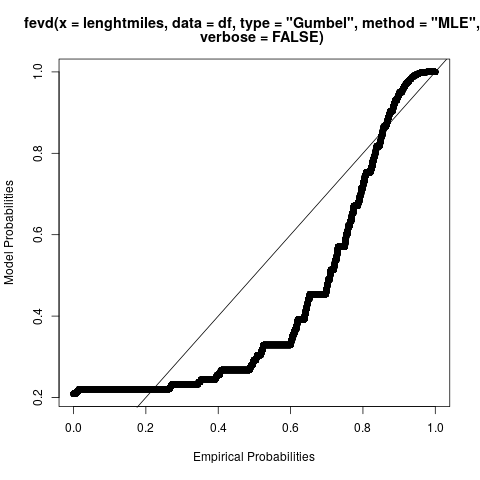

In [41]:
%%R
plot(fitGum, type = c("probprob"),
rperiods = c(2, 5, 10, 20, 50, 80, 100, 120, 200, 250, 300, 500, 800),
)
#

In [44]:
%%R
location = fitGum$results$par[1]
scale = fitGum$results$par[2]
NLLH <- fitGum$results$value
NoObs<- fitGum$n
aGEV<-return.level(fitGum,return.period=T_vect)
ciGEV = ci(fitGum, alpha = 0.05, type = c("return.level"),return.period = T_vect, verbose = FALSE)
return_50 = return.level(fitGum, return.period = c(50))
return_2 = return.level(fitGum, return.period = c(2))
return_size = 1/pextRemes(fitGum, c(1, 2, 3, 4, 5, 6, 7, 8), lower.tail = FALSE, verbose = FALSE)


In [45]:
%R -o [location scale NLLH NoObs aGEV ciGEV return_50 return_2 return_size]


Error in (function (file = "", n = NULL, text = NULL, prompt = "?", keep.source = getOption("keep.source"),  : 
  <text>:1:20: unexpected symbol
1: withVisible({scale NLLH
                       ^


/home2/nhn2/miniconda3/envs/pangeo/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Error in (function (file = "", n = NULL, text = NULL, prompt = "?", keep.source = getOption("keep.source"),  : 
  <text>:1:20: unexpected symbol
1: withVisible({scale NLLH
                       ^

  warnings.warn(x, RRuntimeWarning)


In [ ]:
scale[:]

In [46]:
%%R
location = array(0, dim=c(1,1))
scale = array(0)
return_50 = array(0)
return_2 = array(0)
return_size = array(0)
NLLH = array(0 )
location = fitGum$results$par[1]
scale = fitGum$results$par[2]
NLLH <- fitGum$results$value
NoObs<- fitGum$n
aGEV<-return.level(fitGum,return.period=T_vect)
ciGEV = ci(fitGum, alpha = 0.05, type = c("return.level"),return.period = T_vect, verbose = FALSE)
return_50 = return.level(fitGum, return.period = c(50))
return_2 = return.level(fitGum, return.period = c(2))
return_size = 1/pextRemes(fitGum, c(1, 2, 3, 4, 5, 6, 7, 8), lower.tail = FALSE, verbose = FALSE)


In [47]:
%Rpull location,scale,NLLH,NoObs,aGEV,ciGEV,return_50,return_2,return_size

LookupError: 'location,scale,NLLH,NoObs,aGEV,ciGEV,return_50,return_2,return_size' not found

In [48]:
location

NameError: name 'location' is not defined

-o OUTPUT, --output OUTPUT


 Names of variables to be pushed from rpy2 to shell.user_ns after executing cell body (rpy2’s internal facilities will apply ri2ro as appropriate). Multiple names can be passed separated only by commas with no whitespace.

In [49]:
%R -o location,scale,NLLH,NoObs,aGEV,ciGEV,return_50,return_2,return_size



In [50]:
location

1.310415


In [51]:
np.asarray(location)

array([1.31041496])

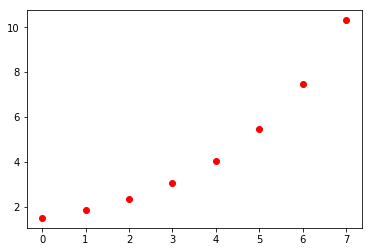

In [52]:
plt.plot(return_size, 'ro')